In [84]:
import pandas as pd 
import numpy as np

In [15]:
df = pd.read_csv('data.csv',index_col=0)

In [16]:
df

,Q40.1,Q41.1,Q42.1,Q43.1,Q44.1,Q45.1,Q46.1,Q47.1,Q48.1,Q49.1,...,Q54.1,Q55.1,Q56.1,Q57.1,Q58.1,Q59.1,Q60.1,Q61.1,Q62.1,Q63.1
0,15,21,9,24,17,18,26,27,23,24,...,14,17,17,15,12,15,10,21,22,19
1,17,15,22,18,16,16,20,18,28,24,...,33,27,23,20,26,21,23,23,22,17
2,22,17,24,13,21,20,7,10,4,6,...,13,10,16,16,11,16,18,21,12,16


In [17]:
q_list = ['Q40.1', 'Q41.1', 'Q42.1', 'Q43.1', 'Q44.1', 'Q45.1', 'Q46.1', 'Q47.1', 'Q48.1', 'Q49.1', 'Q50.1', 'Q51.1', 'Q52.1', 'Q53.1', 'Q54.1', 'Q55.1', 'Q56.1', 'Q57.1', 'Q58.1', 'Q59.1', 'Q60.1', 'Q61.1', 'Q62.1', 'Q63.1']

In [18]:
percent_list = []
for i in q_list:
    percent = df[i][1] /(df[i][0] + df[i][1] + df[i][2])
    percent_list.append(percent)

In [19]:
df = pd.DataFrame(columns = q_list)
a_series = pd.Series(percent_list, index = df.columns)
df = df.append(a_series, ignore_index=True)

In [20]:
df

,Q40.1,Q41.1,Q42.1,Q43.1,Q44.1,Q45.1,Q46.1,Q47.1,Q48.1,Q49.1,...,Q54.1,Q55.1,Q56.1,Q57.1,Q58.1,Q59.1,Q60.1,Q61.1,Q62.1,Q63.1
0,0.314815,0.283019,0.4,0.327273,0.296296,0.296296,0.377358,0.327273,0.509091,0.444444,...,0.55,0.5,0.410714,0.392157,0.530612,0.403846,0.45098,0.353846,0.392857,0.326923


In [21]:
df.to_csv('data_percentage.csv')

In [22]:

# Y = a + b * x(1col / 0 bw) + c1* z1  + c2 * z2  +c3 *z3
  
# chance  bk/color    reg small no
# y
# y
# y
# y






#     ChRegCol = Q40.1,
#     ChRegBW = Q41.1,
#     ChSmCol = Q42.1,
#     ChSmBW = Q43.1,
#     ChNoCol = Q44.1,
#     ChNoBW = Q45.1,
    
#     FiRegCol = Q46.1,
#     FiRegBW = Q47.1,
#     FiSmCol = Q48.1,
#     FiSmBW = Q49.1,
#     FiNoCol = Q50.1,
#     FiNoBW = Q51.1,
    
#     NoRegCol = Q52.1,
#     NoRegBW = Q53.1,
#     NoSmCol = Q54.1,
#     NoSmBW = Q55.1,
#     NoNoCol = Q56.1,
#     NoNoBW = Q57.1,
    
#     ClRegCol = Q58.1,
#     ClRegBW = Q59.1,
#     ClSmCol = Q60.1,
#     ClSmBW = Q61.1,
#     ClNoCol = Q62.1,
#     ClNoBW = Q63.1

In [23]:
regression_col = ['Y', 'Color/B&W', 'Regular', 'Small']

In [24]:
ChRegCol = [0.333333,1,1,0]
ChRegBW = [0.304348,0,1,0]
ChSmCol = [0.413043,1,0,1]
ChSmBW = [0.361702,0,0,1]
ChNoCol = [0.260871,1,0,0]
ChNoBW = [0.291667,0,0,0]

In [25]:
df = pd.DataFrame(columns = regression_col)

a_series = pd.Series(ChRegCol, index = df.columns)
df = df.append(a_series, ignore_index=True)
a_series = pd.Series(ChRegBW, index = df.columns)
df = df.append(a_series, ignore_index=True)
a_series = pd.Series(ChSmCol, index = df.columns)
df = df.append(a_series, ignore_index=True)
a_series = pd.Series(ChSmBW, index = df.columns)
df = df.append(a_series, ignore_index=True)
a_series = pd.Series(ChNoCol, index = df.columns)
df = df.append(a_series, ignore_index=True)
a_series = pd.Series(ChNoBW, index = df.columns)
df = df.append(a_series, ignore_index=True)

In [26]:
df

,Y,Color/B&W,Regular,Small
0,0.333333,1.0,1.0,0.0
1,0.304348,0.0,1.0,0.0
2,0.413043,1.0,0.0,1.0
3,0.361702,0.0,0.0,1.0
4,0.260871,1.0,0.0,0.0
5,0.291667,0.0,0.0,0.0


In [27]:
from sklearn import linear_model
import statsmodels.api as sm

In [28]:
X = df[['Color/B&W', 'Regular', 'Small']]
Y = df['Y']

X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     4.798
Date:                Sun, 18 Apr 2021   Prob (F-statistic):              0.177
Time:                        18:15:33   Log-Likelihood:                 15.816
No. Observations:                   6   AIC:                            -23.63
Df Residuals:                       2   BIC:                            -24.46
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2680      0.025     10.931      0.0

/Users/renjun/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Users/renjun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/stattools.py:70: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [52]:
from sklearn.preprocessing import PolynomialFeatures
#generating interaction terms

X = df[['Color/B&W', 'Regular', 'Small']]
Y = df['Y']
x_interaction = PolynomialFeatures(2, interaction_only=True, include_bias=False).fit_transform(X)

#creating a new dataframe with the interaction terms included
interaction_df = pd.DataFrame(x_interaction, columns = ['Color', 'Regular', 'Small','Color:reg']
#= ['cylinders','displacement','horsepower','weight','acceleration','year','origin',
#                                                        'cylinders:displacement','cylinders:horsepower','cylinders:weight','cylinders:acceleration',
#                                                        'cylinders:year','cylinders:origin','displacement:horsepower','displacement:weight',
#                                                        'displacement:acceleration','displacement:year','displacement:origin','horsepower:weight',
#                                                        'horsepower:acceleration','horsepower:year','horsepower:origin','weight:acceleration',
#                                                        'weight:year','weight:origin','acceleration:year','acceleration:origin','year:origin'])



SyntaxError: unexpected EOF while parsing (<ipython-input-52-98e4082ec081>, line 16)

## Mark

In [29]:
df_percent_data = pd.read_csv('data_percentage.csv')

In [30]:
df_percent_data

,Unnamed: 0,Q40.1,Q41.1,Q42.1,Q43.1,Q44.1,Q45.1,Q46.1,Q47.1,Q48.1,...,Q54.1,Q55.1,Q56.1,Q57.1,Q58.1,Q59.1,Q60.1,Q61.1,Q62.1,Q63.1
0,0,0.314815,0.283019,0.4,0.327273,0.296296,0.296296,0.377358,0.327273,0.509091,...,0.55,0.5,0.410714,0.392157,0.530612,0.403846,0.45098,0.353846,0.392857,0.326923


In [31]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df_percent_data)

   Unnamed: 0     Q40.1     Q41.1  Q42.1     Q43.1     Q44.1     Q45.1  \
0           0  0.314815  0.283019    0.4  0.327273  0.296296  0.296296   

      Q46.1     Q47.1     Q48.1     Q49.1     Q50.1     Q51.1  Q52.1  \
0  0.377358  0.327273  0.509091  0.444444  0.277778  0.259259  0.625   

      Q53.1  Q54.1  Q55.1     Q56.1     Q57.1     Q58.1     Q59.1    Q60.1  \
0  0.357143   0.55    0.5  0.410714  0.392157  0.530612  0.403846  0.45098   

      Q61.1     Q62.1     Q63.1  
0  0.353846  0.392857  0.326923  


In [32]:
ChRegCol = [0.4,1,1,0]
ChRegBW = [0.276596,0,1,0]
ChSmCol = [0.469388,1,0,1]
ChSmBW = [0.446809,0,0,1]
ChNoCol = [0.282609,1,0,0]
ChNoBW = [0.297872,0,0,0]

In [33]:
df = pd.DataFrame(columns = regression_col)

a_series = pd.Series(ChRegCol, index = df.columns)
df = df.append(a_series, ignore_index=True)
a_series = pd.Series(ChRegBW, index = df.columns)
df = df.append(a_series, ignore_index=True)
a_series = pd.Series(ChSmCol, index = df.columns)
df = df.append(a_series, ignore_index=True)
a_series = pd.Series(ChSmBW, index = df.columns)
df = df.append(a_series, ignore_index=True)
a_series = pd.Series(ChNoCol, index = df.columns)
df = df.append(a_series, ignore_index=True)
a_series = pd.Series(ChNoBW, index = df.columns)
df = df.append(a_series, ignore_index=True)

In [34]:
df

,Y,Color/B&W,Regular,Small
0,0.400000,1.0,1.0,0.0
1,0.276596,0.0,1.0,0.0
2,0.469388,1.0,0.0,1.0
3,0.446809,0.0,0.0,1.0
4,0.282609,1.0,0.0,0.0
5,0.297872,0.0,0.0,0.0


In [35]:
X = df[['Color/B&W', 'Regular', 'Small']]
Y = df['Y']

X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     4.248
Date:                Sun, 18 Apr 2021   Prob (F-statistic):              0.196
Time:                        18:16:23   Log-Likelihood:                 12.675
No. Observations:                   6   AIC:                            -17.35
Df Residuals:                       2   BIC:                            -18.18
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2685      0.041      6.487      0.0

/Users/renjun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/stattools.py:70: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [36]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df_percent_data)

   Unnamed: 0     Q40.1     Q41.1  Q42.1     Q43.1     Q44.1     Q45.1  \
0           0  0.314815  0.283019    0.4  0.327273  0.296296  0.296296   

      Q46.1     Q47.1     Q48.1     Q49.1     Q50.1     Q51.1  Q52.1  \
0  0.377358  0.327273  0.509091  0.444444  0.277778  0.259259  0.625   

      Q53.1  Q54.1  Q55.1     Q56.1     Q57.1     Q58.1     Q59.1    Q60.1  \
0  0.357143   0.55    0.5  0.410714  0.392157  0.530612  0.403846  0.45098   

      Q61.1     Q62.1     Q63.1  
0  0.353846  0.392857  0.326923  


In [37]:
ChRegCol = [0.641026,1,1,0]
ChRegBW = [0.375,0,1,0]
ChSmCol = [0.529412,1,0,1]
ChSmBW = [0.479167,0,0,1]
ChNoCol = [0.45098,1,0,0]
ChNoBW = [0.409091,0,0,0]

In [38]:
df = pd.DataFrame(columns = regression_col)

a_series = pd.Series(ChRegCol, index = df.columns)
df = df.append(a_series, ignore_index=True)
a_series = pd.Series(ChRegBW, index = df.columns)
df = df.append(a_series, ignore_index=True)
a_series = pd.Series(ChSmCol, index = df.columns)
df = df.append(a_series, ignore_index=True)
a_series = pd.Series(ChSmBW, index = df.columns)
df = df.append(a_series, ignore_index=True)
a_series = pd.Series(ChNoCol, index = df.columns)
df = df.append(a_series, ignore_index=True)
a_series = pd.Series(ChNoBW, index = df.columns)
df = df.append(a_series, ignore_index=True)

In [39]:
X = df[['Color/B&W', 'Regular', 'Small']]
Y = df['Y']

X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     1.202
Date:                Sun, 18 Apr 2021   Prob (F-statistic):              0.484
Time:                        18:16:31   Log-Likelihood:                 9.2401
No. Observations:                   6   AIC:                            -10.48
Df Residuals:                       2   BIC:                            -11.31
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3703      0.073      5.048      0.0

/Users/renjun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/stattools.py:70: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [40]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df_percent_data)

   Unnamed: 0     Q40.1     Q41.1  Q42.1     Q43.1     Q44.1     Q45.1  \
0           0  0.314815  0.283019    0.4  0.327273  0.296296  0.296296   

      Q46.1     Q47.1     Q48.1     Q49.1     Q50.1     Q51.1  Q52.1  \
0  0.377358  0.327273  0.509091  0.444444  0.277778  0.259259  0.625   

      Q53.1  Q54.1  Q55.1     Q56.1     Q57.1     Q58.1     Q59.1    Q60.1  \
0  0.357143   0.55    0.5  0.410714  0.392157  0.530612  0.403846  0.45098   

      Q61.1     Q62.1     Q63.1  
0  0.353846  0.392857  0.326923  


In [41]:
ChRegCol = [0.534884,1,1,0]
ChRegBW = [0.431818,0,1,0]
ChSmCol = [0.489362,1,0,1]
ChSmBW = [0.314815,0,0,1]
ChNoCol = [0.382979,1,0,0]
ChNoBW = [0.326087,0,0,0]

In [42]:
df = pd.DataFrame(columns = regression_col)

a_series = pd.Series(ChRegCol, index = df.columns)
df = df.append(a_series, ignore_index=True)
a_series = pd.Series(ChRegBW, index = df.columns)
df = df.append(a_series, ignore_index=True)
a_series = pd.Series(ChSmCol, index = df.columns)
df = df.append(a_series, ignore_index=True)
a_series = pd.Series(ChSmBW, index = df.columns)
df = df.append(a_series, ignore_index=True)
a_series = pd.Series(ChNoCol, index = df.columns)
df = df.append(a_series, ignore_index=True)
a_series = pd.Series(ChNoBW, index = df.columns)
df = df.append(a_series, ignore_index=True)

In [43]:
X = df[['Color/B&W', 'Regular', 'Small']]
Y = df['Y']

X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     6.758
Date:                Sun, 18 Apr 2021   Prob (F-statistic):              0.132
Time:                        18:16:34   Log-Likelihood:                 13.815
No. Observations:                   6   AIC:                            -19.63
Df Residuals:                       2   BIC:                            -20.46
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2988      0.034      8.730      0.0

/Users/renjun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/stattools.py:70: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [44]:
df = pd.read_csv('data.csv',index_col=0)

In [45]:
df

,Q40.1,Q41.1,Q42.1,Q43.1,Q44.1,Q45.1,Q46.1,Q47.1,Q48.1,Q49.1,...,Q54.1,Q55.1,Q56.1,Q57.1,Q58.1,Q59.1,Q60.1,Q61.1,Q62.1,Q63.1
0,15,21,9,24,17,18,26,27,23,24,...,14,17,17,15,12,15,10,21,22,19
1,17,15,22,18,16,16,20,18,28,24,...,33,27,23,20,26,21,23,23,22,17
2,22,17,24,13,21,20,7,10,4,6,...,13,10,16,16,11,16,18,21,12,16


In [46]:
g1=['Q40.1','Q46.1','Q52.1','Q58.1']
g2=['Q41.1','Q47.1','Q53.1','Q59.1']
g3=['Q42.1','Q48.1','Q54.1','Q60.1']
g4=['Q43.1','Q49.1','Q55.1','Q61.1']
g5=['Q44.1','Q50.1','Q56.1','Q62.1']
g6=['Q45.1','Q51.1','Q57.1','Q63.1']

In [47]:
summ_treat = 0
summ_all = 0
for i in g1:
    summ_treat += (df[i][0]+df[i][1]+df[i][2])
    summ_all += df[i][1]
print(summ_all/summ_treat)

    

0.45588235294117646


In [48]:
summ_treat = 0
summ_all = 0
for i in g2:
    summ_treat += (df[i][0]+df[i][1]+df[i][2])
    summ_all += df[i][1]
print(summ_all/summ_treat)

0.3425925925925926


In [49]:
summ_treat = 0
summ_all = 0
for i in g3:
    summ_treat += (df[i][0]+df[i][1]+df[i][2])
    summ_all += df[i][1]
print(summ_all/summ_treat)

0.4796380090497738


In [50]:
summ_treat = 0
summ_all = 0
for i in g4:
    summ_treat += (df[i][0]+df[i][1]+df[i][2])
    summ_all += df[i][1]
print(summ_all/summ_treat)

0.40350877192982454


In [51]:
summ_treat = 0
summ_all = 0
for i in g5:
    summ_treat += (df[i][0]+df[i][1]+df[i][2])
    summ_all += df[i][1]
print(summ_all/summ_treat)

0.34545454545454546


In [52]:
summ_treat = 0
summ_all = 0
for i in g6:
    summ_treat += (df[i][0]+df[i][1]+df[i][2])
    summ_all += df[i][1]
print(summ_all/summ_treat)

0.3175355450236967


In [53]:
ChRegCol = [0.4685714285714286,1,1,0]
ChRegBW = [0.34594594594594597,0,1,0]
ChSmCol = [0.47668393782383417,1,0,1]
ChSmBW = [0.3979591836734694,0,0,1]
ChNoCol = [0.3473684210526316,1,0,0]
ChNoBW = [0.32972972972972975,0,0,0]

In [54]:
df = pd.DataFrame(columns = regression_col)

a_series = pd.Series(ChRegCol, index = df.columns)
df = df.append(a_series, ignore_index=True)
a_series = pd.Series(ChRegBW, index = df.columns)
df = df.append(a_series, ignore_index=True)
a_series = pd.Series(ChSmCol, index = df.columns)
df = df.append(a_series, ignore_index=True)
a_series = pd.Series(ChSmBW, index = df.columns)
df = df.append(a_series, ignore_index=True)
a_series = pd.Series(ChNoCol, index = df.columns)
df = df.append(a_series, ignore_index=True)
a_series = pd.Series(ChNoBW, index = df.columns)
df = df.append(a_series, ignore_index=True)

In [55]:
X = df[['Color/B&W', 'Regular', 'Small']]
Y = df['Y']

X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     4.375
Date:                Sun, 18 Apr 2021   Prob (F-statistic):              0.192
Time:                        18:16:42   Log-Likelihood:                 14.517
No. Observations:                   6   AIC:                            -21.03
Df Residuals:                       2   BIC:                            -21.87
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3021      0.030      9.922      0.0

/Users/renjun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/stattools.py:70: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [56]:
df_percent_data = pd.read_csv('data_percentage.csv')

In [57]:
df_percent_data

,Unnamed: 0,Q40.1,Q41.1,Q42.1,Q43.1,Q44.1,Q45.1,Q46.1,Q47.1,Q48.1,...,Q54.1,Q55.1,Q56.1,Q57.1,Q58.1,Q59.1,Q60.1,Q61.1,Q62.1,Q63.1
0,0,0.314815,0.283019,0.4,0.327273,0.296296,0.296296,0.377358,0.327273,0.509091,...,0.55,0.5,0.410714,0.392157,0.530612,0.403846,0.45098,0.353846,0.392857,0.326923


In [58]:
listt = []
for i in q_list:
    listt.append(df_percent_data[i][0])
listt

[0.3148148148148148,
 0.2830188679245283,
 0.4,
 0.3272727272727273,
 0.2962962962962963,
 0.2962962962962963,
 0.37735849056603776,
 0.3272727272727273,
 0.509090909090909,
 0.4444444444444444,
 0.2777777777777778,
 0.25925925925925924,
 0.625,
 0.35714285714285715,
 0.55,
 0.5,
 0.4107142857142857,
 0.392156862745098,
 0.5306122448979592,
 0.40384615384615385,
 0.4509803921568628,
 0.3538461538461539,
 0.3928571428571429,
 0.3269230769230769]

In [60]:
all_regression_col = ['Y', 'Color/B&W', 'Regular', 'Small','Color_reg','Color_small','genre']

In [61]:
ChRegCol = [0.3148148148148148,1,1,0,1,0,'Ch']
ChRegBW = [0.2830188679245283,0,1,0,0,0,'Ch']
ChSmCol = [0.4,1,0,1,0,1,'Ch']
ChSmBW = [0.3272727272727273,0,0,1,0,0,'Ch']
ChNoCol =[0.2962962962962963,1,0,0,0,0,'Ch']
ChNoBW = [0.2962962962962963,0,0,0,0,0,'Ch']

FiRegCol = [0.37735849056603776,1,1,0,1,0,'Fi']
FiRegBW = [0.3272727272727273,0,1,0,0,0,'Fi']
FiSmCol = [0.509090909090909,1,0,1,0,1,'Fi']
FiSmBW = [0.4444444444444444,0,0,1,0,0,'Fi']
FiNoCol = [0.2777777777777778,1,0,0,0,0,'Fi']
FiNoBW = [0.25925925925925924,0,0,0,0,0,'Fi']
    
NoRegCol =[0.625,1,1,0,1,0,'NF']
NoRegBW = [0.35714285714285715,0,1,0,0,0,'NF']
NoSmCol = [0.55,1,0,1,0,1,'NF']
NoSmBW = [0.5,0,0,1,0,0,'NF']
NoNoCol = [0.4107142857142857,1,0,0,0,0,'NF']
NoNoBW = [0.392156862745098,0,0,0,0,0,'NF']

ClRegCol =[0.5306122448979592,1,1,0,1,0,'Cl']
ClRegBW = [0.40384615384615385,0,1,0,0,0,'Cl']
ClSmCol =[0.4509803921568628,1,0,1,0,1,'Cl']
ClSmBW = [0.3538461538461539,0,0,1,0,0,'Cl']
ClNoCol = [0.3928571428571429,1,0,0,0,0,'Cl']
ClNoBW = [0.3269230769230769,0,0,0,0,0,'Cl']

In [62]:
df = pd.DataFrame(columns = all_regression_col)

for i in [ChRegCol,ChRegBW,
    ChSmCol,
    ChSmBW,
    ChNoCol,
    ChNoBW,
     FiRegCol,
    FiRegBW,
    FiSmCol,
    FiSmBW,
    FiNoCol,
    FiNoBW,
    NoRegCol,
    NoRegBW,
    NoSmCol,
    NoSmBW,
    NoNoCol,
    NoNoBW,
 ClRegCol,
    ClRegBW,
    ClSmCol,
    ClSmBW,
    ClNoCol,
    ClNoBW]:
    a_series = pd.Series(i, index = df.columns)
    df = df.append(a_series, ignore_index=True)


In [63]:
df

,Y,Color/B&W,Regular,Small,Color_reg,Color_small,genre
0,0.314815,1,1,0,1,0,Ch
1,0.283019,0,1,0,0,0,Ch
2,0.400000,1,0,1,0,1,Ch
3,0.327273,0,0,1,0,0,Ch
4,0.296296,1,0,0,0,0,Ch
5,0.296296,0,0,0,0,0,Ch
6,0.377358,1,1,0,1,0,Fi
7,0.327273,0,1,0,0,0,Fi
8,0.509091,1,0,1,0,1,Fi
9,0.444444,0,0,1,0,0,Fi


In [64]:
X = df[['Color/B&W', 'Regular', 'Small','Color_reg','Color_small']]
Y = df['Y']

X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X.astype(float)).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.422
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     2.630
Date:                Sun, 18 Apr 2021   Prob (F-statistic):             0.0592
Time:                        18:20:52   Log-Likelihood:                 29.225
No. Observations:                  24   AIC:                            -46.45
Df Residuals:                      18   BIC:                            -39.38
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3187      0.041      7.708      

In [85]:
all_regression_col = ['Y', 'Color', 'Regular', 'Small','Color_reg','Color_small','Type_Children','Type_Finance','Type_Non-Fic','Type_Classic']

In [86]:
ChRegCol = [0.3148148148148148,1,1,0,1,0,1,0,0,0]
ChRegBW = [0.2830188679245283,0,1,0,0,0,1,0,0,0]
ChSmCol = [0.4,1,0,1,0,1,1,0,0,0]
ChSmBW = [0.3272727272727273,0,0,1,0,0,1,0,0,0]
ChNoCol =[0.2962962962962963,1,0,0,0,0,1,0,0,0]
ChNoBW = [0.2962962962962963,0,0,0,0,0,1,0,0,0]

FiRegCol = [0.37735849056603776,1,1,0,1,0,0,1,0,0]
FiRegBW = [0.3272727272727273,0,1,0,0,0,0,1,0,0]
FiSmCol = [0.509090909090909,1,0,1,0,1,0,1,0,0]
FiSmBW = [0.4444444444444444,0,0,1,0,0,0,1,0,0]
FiNoCol = [0.2777777777777778,1,0,0,0,0,0,1,0,0]
FiNoBW = [0.25925925925925924,0,0,0,0,0,0,1,0,0]
    
NoRegCol =[0.625,1,1,0,1,0,0,0,1,0]
NoRegBW = [0.35714285714285715,0,1,0,0,0,0,0,1,0]
NoSmCol = [0.55,1,0,1,0,1,0,0,1,0]
NoSmBW = [0.5,0,0,1,0,0,0,0,1,0]
NoNoCol = [0.4107142857142857,1,0,0,0,0,0,0,1,0]
NoNoBW = [0.392156862745098,0,0,0,0,0,0,0,1,0]

ClRegCol =[0.5306122448979592,1,1,0,1,0,0,0,0,1]
ClRegBW = [0.40384615384615385,0,1,0,0,0,0,0,0,1]
ClSmCol =[0.4509803921568628,1,0,1,0,1,0,0,0,1]
ClSmBW = [0.3538461538461539,0,0,1,0,0,0,0,0,1]
ClNoCol = [0.3928571428571429,1,0,0,0,0,0,0,0,1]
ClNoBW = [0.3269230769230769,0,0,0,0,0,0,0,0,1]

In [87]:
df = pd.DataFrame(columns = all_regression_col)

for i in [ChRegCol,ChRegBW,
    ChSmCol,
    ChSmBW,
    ChNoCol,
    ChNoBW,
     FiRegCol,
    FiRegBW,
    FiSmCol,
    FiSmBW,
    FiNoCol,
    FiNoBW,
    NoRegCol,
    NoRegBW,
    NoSmCol,
    NoSmBW,
    NoNoCol,
    NoNoBW,
 ClRegCol,
    ClRegBW,
    ClSmCol,
    ClSmBW,
    ClNoCol,
    ClNoBW]:
    a_series = pd.Series(i, index = df.columns)
    df = df.append(a_series, ignore_index=True)

In [88]:
df

,Y,Color,Regular,Small,Color_reg,Color_small,Type_Children,Type_Finance,Type_Non-Fic,Type_Classic
0,0.314815,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.283019,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.400000,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.327273,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.296296,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.296296,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,0.377358,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7,0.327273,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,0.509091,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
9,0.444444,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [91]:
X = df[['Color', 'Regular', 'Small','Color_reg','Color_small'
       ,'Type_Children','Type_Finance','Type_Non-Fic','Type_Classic']]
Y = df['Y']

X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X.astype(float)).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     6.672
Date:                Sun, 18 Apr 2021   Prob (F-statistic):           0.000851
Time:                        18:48:37   Log-Likelihood:                 40.846
No. Observations:                  24   AIC:                            -63.69
Df Residuals:                      15   BIC:                            -53.09
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2549      0.022     11.420

In [92]:
X = df[['Color', 'Regular', 'Small','Color_reg','Color_small'
       ,'Type_Finance','Type_Non-Fic','Type_Classic']]
Y = df['Y']

X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X.astype(float)).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     6.672
Date:                Sun, 18 Apr 2021   Prob (F-statistic):           0.000851
Time:                        18:48:37   Log-Likelihood:                 40.846
No. Observations:                  24   AIC:                            -63.69
Df Residuals:                      15   BIC:                            -53.09
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2463      0.034      7.208   

In [101]:
!conda install --yes seaborn 0.11.0

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - 0.11.0

Current channels:

  - https://repo.anaconda.com/pkgs/main/osx-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/osx-64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




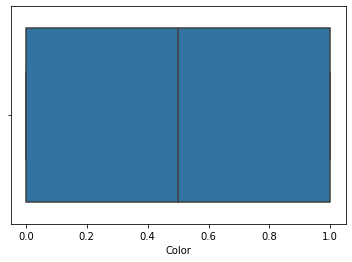

In [102]:
[const            0.2463      0.034      7.208      0.000       0.173       0.319]
[Color            0.0258      0.039      0.653      0.524      -0.058       0.110]
[Regular          0.0242      0.039      0.612      0.550      -0.060       0.108]
[Small            0.0877      0.039      2.223      0.042       0.004       0.172]
[Color_reg        0.0934      0.056      1.673      0.115      -0.026       0.212]
[Color_small      0.0454      0.056      0.813      0.429      -0.074       0.164]
[Type_Finance     0.0463      0.032      1.435      0.172      -0.022       0.115]
[Type_Non-Fic     0.1529      0.032      4.745      0.000       0.084       0.222]
[Type_Classic     0.0902      0.032      2.800      0.013       0.022       0.159]


In [103]:
import pandas as pd
from pandas import DataFrame
import pylab
import matplotlib.pyplot as plot
pd.set_option('display.width',200)

# abalone.columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whl weight',
#                    'Shckd weight', 'Visc weight', 'Shll weight',
#                    'Rings']

# Print first few rows of data
print(df.head())
print
# Print last few rows
print(df.tail())

          Y  Color  Regular  Small  Color_reg  Color_small  Type_Children  Type_Finance  Type_Non-Fic  Type_Classic
0  0.314815    1.0      1.0    0.0        1.0          0.0            1.0           0.0           0.0           0.0
1  0.283019    0.0      1.0    0.0        0.0          0.0            1.0           0.0           0.0           0.0
2  0.400000    1.0      0.0    1.0        0.0          1.0            1.0           0.0           0.0           0.0
3  0.327273    0.0      0.0    1.0        0.0          0.0            1.0           0.0           0.0           0.0
4  0.296296    1.0      0.0    0.0        0.0          0.0            1.0           0.0           0.0           0.0
           Y  Color  Regular  Small  Color_reg  Color_small  Type_Children  Type_Finance  Type_Non-Fic  Type_Classic
19  0.403846    0.0      1.0    0.0        0.0          0.0            0.0           0.0           0.0           1.0
20  0.450980    1.0      0.0    1.0        0.0          1.0           

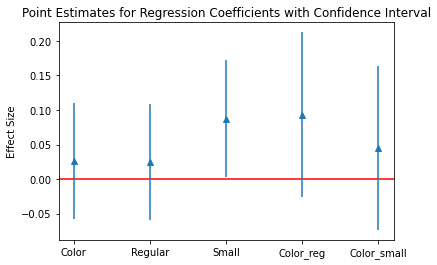

In [115]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array(['Color', 'Regular', 'Small', 'Color_reg', 'Color_small'])
y = np.array([0.0258,0.0242,0.0877,0.0934,0.0454]) 
e = np.array([0.084,0.084,0.084,0.119,0.119])
plt.hlines(0,-1,5,colors='r')
plt.errorbar(x, y, e, linestyle='None', marker='^')
plt.title('Point Estimates for Regression Coefficients with Confidence Interval')
plt.ylabel('Effect Size')
plt.show()